<a href="https://colab.research.google.com/github/DennisRapheal/blockchain-voting-system/blob/main/MLP%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92pat_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jupyter Notebook** **基本操作**
Colab所有Python運作都是在Jupyter Notebook中運作

---


*   使用GPU模式：*-->編輯-->筆記本設定-->硬體加速器-->GPU-->儲存*
*   連接虛擬機器：*-->連線*（如何開啟全新虛擬機：-->RAM-->管理工作階段-->終止-->重新連線）













# **如何執行命令提示字元**
通常長成：

```
!（命令）
```

常用命令：
*   `!pip3 install （＋模組）`：安裝模組
*   `!pip3 list`：檢查已安裝模組
*   `!pwd`：顯示目前目錄
*   `!mkdir （＋目錄名稱）`：建立新目錄
*   `!mv （＋欲移動的檔案名稱）（＋目的檔案名稱）`：移動檔案
*   `!cp （＋欲移動的檔案名稱）（＋目的檔案名稱）`：複製檔案
*   `!unzip（＋壓縮檔名）`：解壓縮
*   `%cd（＋欲切換的目錄）`：切換目錄




In [ ]:
from keras.datasets import cifar10

# **圖表製作**
Matplotlib官方網址：（https://matplotlib.org/stable/gallery/index.html）

中文介紹網址：（https://medium.com/%E6%95%B8%E6%93%9A%E4%B8%8D%E6%AD%A2-not-only-data/%E6%B7%B1%E5%85%A5%E6%B7%BA%E5%87%BA-python-%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6-matplotlib-seaborn-%E6%A0%B8%E5%BF%83%E6%8C%87%E5%8D%97%E8%88%87%E7%B9%AA%E8%A3%BD-44a47458912）


*  #程式碼#




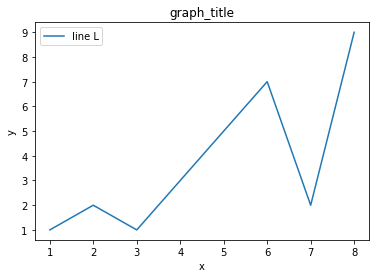

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [1, 2, 1, 3, 5, 7, 2, 9]
plt.plot(x,y,label="line L")
plt.plot()

plt.xlabel("x")
plt.ylabel("y")
plt.title("graph_title")
plt.legend() #顯示「line L」的標注
plt.show()


# ***如何讀取檔案***


---



讀取檔案程式如下，可以讀取雲端或裝置中的檔案

```
from google.colab import files
uploaded = files.upload()
```



In [ ]:
from google.colab import files
uploaded = files.upload()

# ***MLP多層感知器***
機器學習 lesson 1

---

* 如何下載 MNIST 資料集

* 如何顯示訓練資料

* #程式碼#





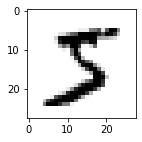

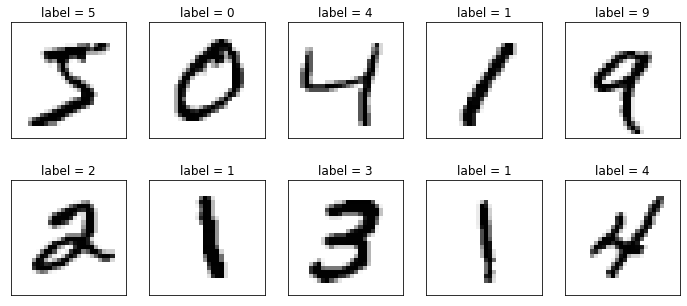

In [ ]:
import numpy as np
from keras.datasets import mnist

#外匡製作：matplot
#更多圖表製作：https://matplotlib.org/stable/gallery/index.html
import matplotlib.pyplot as plt

#＠＠下載mnist資料集
(train_feature , train_label), \
(test_feature , test_label) = mnist.load_data()
    
#＠＠下載後讀入方法
    #(train_feature , train_label)
    #---> 訓練資料
    #(test_feature , test_label)
    #---> 測試資料
(train_feature , train_label),(test_feature , test_label) = mnist.load_data()

#＠＠如和取得資料資訊
#print(len(train_feature), len(train_label)) 
    #---> len()查看資料長度
#print(train_feature.shape , train_label.shape) 
    #---> 函式：「.shape」
    #---> 取得(60000, 28, 28)(60000,)意即（六萬張28*28的訓練資料）（60000個標籤)

#＠＠顯是訓練資料的圖片與值
    #＠先：import matplotlib.pylot as plt

def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2) 
    # ---> 設定圖片大小
    plt.imshow(image, cmap='binary')
    plt.show()

show_image(train_feature[0])

#＠＠查看多筆訓練資料
    #方便觀測預測結果
def show_images_labels_predictions(images ,labels ,predictions ,start_id , num=10 ):
    plt.gcf().set_size_inches(12 ,14)
    if (num>25) : 
        num=25
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
        # ---> 顯示黑白圖片
        ax.imshow(images[start_id], cmap = 'binary')
        
        # 有AI的預測結果，才會在標題顯示結果；沒有則顯示真實數據
        if (len(predictions) > 0 ):
            title = 'ai =' +str(predictions[start_id])
            title += (' (o)' if predictions[start_id]
                      == labels[start_id] else  ' (x)')
            #---> 預測正確顯示(o)  預測錯誤顯示（x）
            title += '\nlabel = ' +str(labels[start_id])
        else : 
            title = 'label = '+str(labels[start_id])
        
        ax.set_title(title ,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        # ---> plot 的 x , y 不顯示刻度
        start_id+=1
    plt.show()
    
show_images_labels_predictions(train_feature ,train_label ,[] ,0 ,10 )

# **Feature 資料預處理**
增加模型效率

---



*   轉成一維向量
*   標準化

# **Label 資料預處理**



---


*   One-Hot Encoding






In [ ]:
# 2-11 資料預處理
# mnist 輸入的是 28*28 的二維圖片
# 轉換成 784 個 float 的一維向量
# 標準化後才可當作輸入


from keras.datasets import mnist
from keras.utils import np_utils

(train_feature , train_label), \
(test_feature , test_label) = mnist.load_data()

#＠＠ 函式 ".reshape()" 可以把圖片轉成 784個一維向量
#＠＠ 函式 “.astype()” 可將數字串改成 float型別
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float')

#檢查
print(train_feature_vector.shape,test_feature_vector.shape)#---> 輸出（60000 ,784）（10000, 784）

#＠＠ 標準化
#＠將 0~255的數字，除以255得到 0~1 之間的float，稱為標準化（Normalize），可增加預測模型準確度以及訓練效率
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

print(train_feature_normalize[0])

print()
#＠＠ One_Hot Encoding
#只看和真實質相同的label，也就是把和真實值相同的label設為"1"，其他設為"0"
#先 from keras.utils import np_utils 再用np_utils.to_categorical()
print(train_label[0:5])

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
#檢查
print(train_label_onehot[0:5])
print(test_label_onehot[0:5])


# **建立MLP模型**
# 包含前一章資料預處理 
（下一章附有完整程式碼）

---



*   建立Sequencial模型

```
from keras.models import Sequential
model = Sequential()
```

*   建立**輸入層和隱藏層**


```
# 以「.add」函式增加輸入層以及隱藏層
#「Dence(參數1,參數2,參數3,參數4)」為上下緊密連接的神經網路層
# 參數1「unit＝256」：代表隱藏層神經元數目有256個
# 參數2「input_dim=784」：代表輸入層神經元數目有784個
# 參數3「kernal_initializer='normal'」：代表使用常態分佈的亂數初始化權重（weight）和偏置（bias）
# 參數4「activation='relu'」：制定激勵函式，'relu':大於零為identity function，小於 0 輸出 0

from keras.layers import Dence
model.add(Dence(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
```



*   建立**輸出層**


```
# 一樣適用「.add」和「Dense」
# 因為神經元數和上一個隱藏層一樣，所以不用設定
# Dence(參數1,參數2,參數3,參數4)
# 參數1「unit=10」：因為只有可能0~9
# 參數4「activation='softmax'」'softmax'把數據轉換成機率分布

model.add(Dense(units=10,,kernel_initializer='normal', activation='softmax'))
```



# **訓練模型**

包含訓練模型以及預估模型
---
* 訓練方式

```
# 以「.compile(參數1,參數2,參數3)」來定義以下訓練模型
# 參數1「loss='categorical_crossentropy'」：定義Loss function，設為categorical_crossentropy
# 參數2「optimizer='adam'」：定義Optimizer（最佳化方法）為"adam"
# 參數3「metrics=['accuracy']」：定義metrics（評估準確率的方法）為"accuracy"準確率

```
# **進行訓練**

fit的方法可以進行學習，訓練時必須設定「訓練資料」和「標籤」

```
model.fit(x=特徵法 ,y=標籤 ,validation_split = 驗證資料百分比 ,epochs=訓練資料 ,batch_size=每批次有多少筆)
# x,y：設定訓練特徵值和標籤，兩個參數都是必須的
# validation_split：例如0.2表示將訓練資料保留20%當作驗證資料。若省略則全部保留
# epochs：訓練次數。若省略則訓練一次
# verbose：設定是否顯示訓練過程（0不顯示、1詳細顯示、2簡易顯示）
train_history = model.fit(x=train_feature_normalize, y=train_label_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)
```

**例如**：以（train_feature_normalize, train_label_onehot）為訓練特徵值和標籤，訓練資料保留20%作為驗證資料；也就是說mnist的60000筆資料內有60000 * 0.8 = 48000做為訓練資料、12000筆做為驗證資料。總共訓練10次，每次批次讀取200筆資料，並顯示簡易的訓練過程。

**loss : **訓練資料的損失函數誤差值
**acc : **訓練資料的評估準確率
**val_loss : **驗證資料的損失函數誤差值
**val_acc : **訓練資料的評估準確率

#**評估準確率**
evaluate 方法可以評估模型的損失函式誤差值和準確率，他會回傳串列，第0個元素為損失函式誤差值,第1個元素為準確率。

```
#使用測試資料評估模型準確率。
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("\n 準確率 = ', scores[1])
```

#**進行預測**
訓練好的模型,就可以用predict_classes 方法進行預測,本例是以測試資料將其特徵值標準化後的 test_feature_normalize 作預測。

```
prediction=model.predict_classes(test_feature_normalize)
```
以下是顯示訓練好的模型對MNIST 資料集前10 筆預測的結果。
```
show_images_labels_predictions(test_feature, test_label, prediction, 0)
#辨識成功率相當高
```




In [ ]:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=10,kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history = model.fit(x=train_feature_normalize, y=train_label_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)
#實際執行結果請見最終程式碼

scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n 準確率 = ', scores[1])

prediction=model.predict_classes(test_feature_normalize)

show_images_labels_predictions(test_feature, test_label, prediction, 0)

[連結文字](https:// [連結文字](https://))# ***Overfitting*** 


---


也就是過度符合訓練資料，造成訓練時準確度增加，但 val_acc 的準確度卻沒有增加

***解決辦法：***

ization
*   清單項目






# **最終程式碼**

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
240/240 - 14s - loss: 0.4381 - accuracy: 0.8816 - val_loss: 0.2236 - val_accuracy: 0.9380
Epoch 2/10
240/240 - 0s - loss: 0.1932 - accuracy: 0.9450 - val_loss: 0.1630 - val_accuracy: 0.9530
Epoch 3/10
240/240 - 1s - loss: 0.1376 - accuracy: 0.9613 - val_loss: 0.1309 - val_accuracy: 0.9629
Epoch 4/10
240/240 - 1s - loss: 0.1062 - accuracy: 0.9693 - val_loss: 0.1149 - val_accuracy: 0.9652
Epoch 5/10
240/240 - 1s - loss: 0.0835 - accuracy: 0.9766 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 6/10
240/240 - 1s - loss: 0.0681 - accuracy: 0.9810 - val_loss: 0.0930 - val_accuracy: 0.9718
Epoch 7/10
240/240 - 1s - loss: 0.0556 - accuracy: 0.9845 - val_loss: 0.0887 - val_accuracy: 0.9726
Epoch 8/10
240/240 - 0s - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.0833 - val_accuracy: 0.9734
Epoch 9/10
240/240 - 1s - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 10/10
240/240 - 0s - loss: 0

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


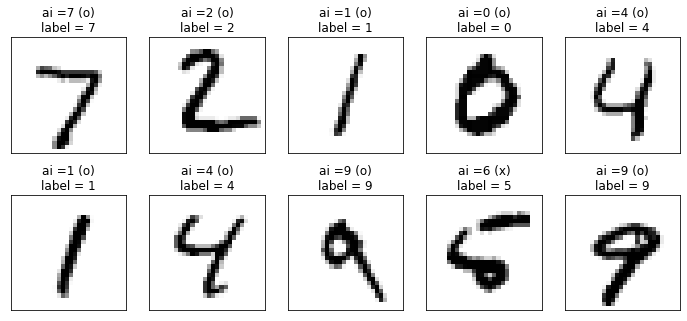

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
np.random.seed(10)
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense


#外匡製作：matplot
#更多圖表製作：https://matplotlib.org/stable/gallery/index.html
import matplotlib.pyplot as plt

#＠＠下載後讀入方法
    #(train_feature , train_label)
    #---> 訓練資料
    #(test_feature , test_label)
    #---> 測試資料
(train_feature , train_label),(test_feature , test_label) = mnist.load_data()

#＠＠查看多筆訓練資料
    #方便觀測預測結果
def show_images_labels_predictions(images ,labels ,predictions ,start_id , num=10 ):
    plt.gcf().set_size_inches(12 ,14)
    if (num>25) : 
        num=25
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
       # ---> 顯示黑白圖片
        ax.imshow(images[start_id], cmap = 'binary')
        
        # 有AI的預測結果，才會在標題顯示結果；沒有則顯示真實數據
        if  (len(predictions) > 0 ):
          title = 'ai =' +str(predictions[start_id])
          title += (' (o)' if predictions[start_id] == labels[start_id] else  ' (x)')
            #---> 預測正確顯示(o)  預測錯誤顯示（x）
          title += '\nlabel = ' +str(labels[start_id])
        else : 
          title = 'label = '+str(labels[start_id])
        
        ax.set_title(title ,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        # ---> plot 的 x , y 不顯示刻度
        start_id+=1
    plt.show()
    
#show_images_labels_predictions(train_feature ,train_label ,[] ,0 ,10 )


##資料預處理##
#＠＠ 函式 ".reshape()" 可以把圖片轉成 784個一維向量
#＠＠ 函式 “.astype()” 可將數字串改成 float型別
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float')

#檢查
#print(train_feature_vector.shape,test_feature_vector.shape)#---> 輸出（60000 ,784）（10000, 784）

#＠＠ 標準化
#＠將 0~255的數字，除以255得到 0~1 之間的float，稱為標準化（Normalize），可增加預測模型準確度以及訓練效率
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#print(train_feature_normalize[0])

#＠＠ One_Hot Encoding
#只看和真實質相同的label，也就是把和真實值相同的label設為"1"，其他設為"0"
#先 from keras.utils import np_utils 再用np_utils.to_categorical()
#print(train_label[0:5])
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
#檢查
#print(train_label_onehot[0:5])
#print(test_label_onehot[0:5])

model = Sequential()

model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=10,kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history = model.fit(x=train_feature_normalize, y=train_label_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

#@@評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
#print('\n 準確率 = ', scores[1])

#@@進行預測
##使用前記得解禁" def_show_images_labels_predictions ""
prediction = model.predict_classes(test_feature_normalize)
show_images_labels_predictions(test_feature, test_label, prediction, 0)

#@@儲存模型
model.save('Mnist_mlp_model.h5')

# **模型儲存和載入**
儲存訓練模型

---

**模型儲存**

Keras 使用HDF5 檔案系統來儲存模型，模型儲存一般使用.h5 為副檔名，語法：
```
model.save('檔名')
# 例如將模型存為<'Mnist_mlp_model.h5'>
---> model.save('Mnist_mlp_model.h5')

# 刪除模型
del model
```
訓練的程式碼和訓練的程式碼和<Keras_Mnist_ML.py>相同,只列出儲存模型的程式碼。


**載入模型**

當訓練資料很龐大時，訓練一次可能需要很長的時間，這時就可以直接載入訓練好的模型作為預測，以減少重複訓練的時間。
記得先以
```
from keras.models import load_model
```
匯入相關模組：

Reference：https://blog.gtwang.org/programming/keras-save-and-load-model-tutorial/
```
load_model('檔名')
load_model('Mnist_mlp_model.h5')
```


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
np.random.seed(10)
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import load_model

# 建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature , train_label),\
(test_feature , test_label) = mnist.load_data()

def show_images_labels_predictions(images, labels, predictions, start_id, num=10 ):
    plt.gcf().set_size_inches(12 ,14)
    if (num>25) : num=25
    for i in range(0,num):
        ax = plt.subplot(5, 5, i+1)
       # ---> 顯示黑白圖片
        ax.imshow(images[start_id], cmap = 'binary')
       
       # 有AI的預測結果，才會在標題顯示結果；沒有則顯示真實數據
        if (len(predictions) > 0 ):
            title = 'ai =' +str(predictions[start_id])
            title += (' (o)' if predictions[start_id]
                      == labels[start_id] else  ' (x)')
            #---> 預測正確顯示(o)  預測錯誤顯示（x）
            title += '\nlabel = ' +str(labels[start_id])
        else : 
            title = 'label = '+str(labels[start_id])
        
        ax.set_title(title ,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        # ---> plot 的 x , y 不顯示刻度
        start_id+=1
        
    plt.show()

# 將 Features 特徵值換為 784 個 float 數字的一維向量
test_feature_vector = test_feature.reshape(len( test_feature),784).astype ('float32')


# Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

 # 從 HDF5 檔案中載入模型
print(" 載入模型： Mnist_mlp_model.h5") 
model = load_model('Mnist_mlp_model.h5')  


# 預測
prediction=model.predict_classes (test_feature_normalize) 

# 顯示圖像、預測值、真實值
show_images_labels_predictions(test_feature, test_label, prediction, 0)


# ***Overfitting***


---

意即過度擬合，訓練時acc訓練的準確度提高，但val_acc驗證的準確度卻沒有增加。

***解決方法：***



*   DropOut


> 加入適當的拋棄層可以解決overfitting的問題
```
＃先匯入模組
from keras.layers import Dropout
＃呼叫方法
model.add(Dropout(放棄百分比))
＃例：放棄50%
model.add(Dropout(0.5))
```
DropOut通常會在隱藏層中加入，以提升準確度
```
＃建立模型
model.Sequential()
＃輸入層（加入激活函數）
model.add(Dense(units=256, input_dim=784, kernel_initiaalizer='normal', activation='relu'))
＃隱藏層１
model.add(Dropout(0.2))
＃隱藏層２
model.add(Dense(units=128, kernel_initiaalizer='normal', activation='relu'))
model.add(Dropout(0.2))
＃輸出層
model.add(Dense(units=10,kernel_initiaalizer='normal',activation='softmax'))
```

* Regularization


